<a href="https://colab.research.google.com/github/gmortuza/machine-learning/blob/master/models/regression/logistic_regression/Logistic%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.metrics import f1_score

Text(0.5, 1.0, 'Sigmoid function')

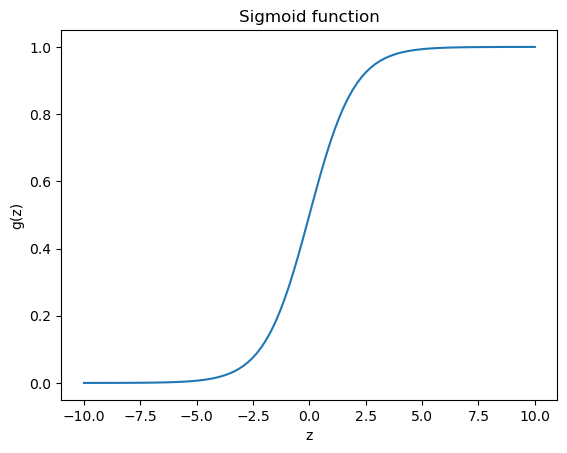

In [2]:
def sigmoid(z):
    z = 1/(1 + np.exp(-z))
    return z
z = np.linspace(-10, 10, 100)   
plt.plot(z, sigmoid(z)) 
plt.xlabel("z") 
plt.ylabel("g(z)") 
plt.title("Sigmoid function")

In [3]:
def propagate(w, b, x, y):
        """
        Implement the cost function and its gradient for the propagation explained above

        :param: w -- weights, a numpy array of size (x.shape[1], 1). Number of feature of x
        :param: b -- bias, a scalar
        :param: x -- data of size (number_of_training_example, number of feature)
        :param: y -- true "label" vector of size (number_of_training_example, 1)

        :returns: cost -- negative log-likelihood cost for logistic regression
        :returns: dw -- gradient of the loss with respect to w, thus same shape as w
        :returns: db -- gradient of the loss with respect to b, thus same shape as b
        """

        m = x.shape[0]  # Number of training example

        # FORWARD PROPAGATION (FROM x TO COST)
        a = sigmoid(np.dot(x, w) + b)  # compute activation
        cost = - np.sum(y * np.log(a) + (1 - y) * np.log(1 - a)) / m  # compute cost
        # BACKWARD PROPAGATION (TO FIND GRAD)
        dw = np.dot(x.T, (a - y)) / m
        db = np.sum(a - y) / m

        cost = np.squeeze(cost)

        grads = {"dw": dw,
                 "db": db}
        return grads, cost


In [4]:
def optimize(w, b, x, y, num_iteration, learning_rate, verbose):
        """
        This function optimizes w and b by running a gradient descent algorithm

        Arguments:
        w -- weights, a numpy array of size (x.shape[1], 1). Number of feature of x
        b -- bias, a scalar
        x -- data of shape (number_of_training_example, number of feature)
        y -- true "label" vector, of shape (1, number of examples)

        Returns:
        params -- dictionary containing the weights w and bias b
        grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
        costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
        """

        costs = {}

        for i in range(num_iteration):

            # Cost and gradient calculation
            grads, cost = propagate(w, b, x, y)

            # Retrieve derivatives from grads
            dw = grads["dw"]
            db = grads["db"]

            # update rule
            w = w - learning_rate * dw
            b = b - learning_rate * db

            # Record the costs
            if i % 100 == 0:
                costs[i] = cost

            # Print the cost every 100 training iterations
            if verbose and i % 100 == 0:
                print("Cost after iteration %i: %f" % (i, cost))

        return w, b, costs

In [5]:
def predict(x, w, b):
        """
        Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

        Arguments:
        w -- weights, a numpy array of size (x.shape[1], 1). Number of feature of x
        b -- bias, a scalar
        x -- data of size (number_of_training_example, number of feature)

        Returns:
        y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in x
        """

        m = x.shape[0]
        y_prediction = np.zeros((m, 1))
        w = w.reshape(x.shape[1], 1)

        # Compute vector "A" predicting the probabilities of a cat being present in the picture
        a = sigmoid(np.dot(x, w) + b)

        for i in range(a.shape[0]):
            # Convert probabilities A[0,i] to actual predictions p[0,i]
            y_prediction[i][0] = 0 if a[i][0] <= .5 else 1

        return y_prediction

In [6]:
def model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.005, verbose = True):
        """
        Builds the logistic regression model by calling the function you've implemented previously

        Arguments:
        x_train -- training set represented by a numpy array of shape (number_of_training_example, number of feature)
        y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
        x_test -- test set represented by a numpy array of shape (number_of_training_example, number of feature)
        y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
        num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
        learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
        print_cost -- Set to true to print the cost every 100 iterations

        Returns:
        d -- dictionary containing information about the model.
        """
        # Resizing the y input
        y_train = y_train.reshape(-1, 1)
        y_test = y_test.reshape(-1, 1)
        # initialize parameters with zeros
        w = np.zeros((x_train.shape[1],1))
        b = 0

        # Gradient descent
        w, b, costs = optimize(w, b, x_train, y_train, num_iterations, learning_rate, verbose)
        y_prediction_test = predict(x_test, w, b)
        y_prediction_train = predict(x_train, w, b)
        train_acc = 100 - np.mean(np.abs(y_prediction_train - y_train)) * 100
        test_acc = 100 - np.mean(np.abs(y_prediction_test - y_test)) * 100
        train_f1 = f1_score(y_train, y_prediction_train)
        test_f1 = f1_score(y_test, y_prediction_test)
        print("Train f1 score: ", train_f1)
        print("Test f1 score: ", test_f1)

        return {"costs": costs, "train_accuracy": train_acc, "test_accuracy": test_acc, "train_f1": train_f1,
                "test_f1": test_f1}

In [7]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.33, random_state=42)

In [9]:
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [10]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

X_train:  (381, 30)
y_train:  (381,)


In [11]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.005, verbose = False)

Train f1 score:  0.9853249475890986
Test f1 score:  0.9917355371900827


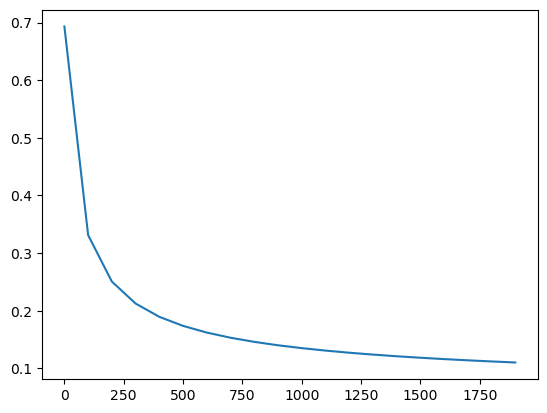

In [12]:
plt.plot(list(d["costs"].keys()), list(d["costs"].values()))